In [1]:
options(warn = -1)

suppressMessages(library(ggplot2))
suppressMessages(library(cowplot))
suppressMessages(library(gprofiler2))
suppressMessages(library(dplyr))
suppressMessages(library(ggrepel))

In [2]:
out_dir <- "../../results/05_fibroblast/18_fib1_vs_fib2"

if(!dir.exists(out_dir)){
    dir.create(out_dir, recursive = TRUE)
}

In [3]:
df <- read.csv("../../results/05_fibroblast/17_fib1_vs_fib2/fib1_vs_fib2.csv")

In [4]:
df1 <- subset(df, adjusted.p.value !=0)

In [5]:
min(df1$adjusted.p.value)

[1] 1.132259e-307

In [6]:
df$adjusted.p.value[df$adjusted.p.value == 0] <- min(df1$adjusted.p.value)

In [7]:
head(df)

,gene,log.fold.change,p.value,adjusted.p.value,cluster
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,WISP2,6.691909,0,1.132259e-307,Fib1
2,SCARA5,6.163282,0,1.132259e-307,Fib1
3,CLU,4.849216,0,1.132259e-307,Fib1
4,DCN,1.980738,0,1.132259e-307,Fib1
5,FBLN1,3.146318,0,1.132259e-307,Fib1
6,SFRP2,4.319106,0,1.132259e-307,Fib1


In [8]:
df$adjusted.p.value_minus_log10 <- -log10(df$adjusted.p.value)
#df <- subset(df, adjusted.p.value < 1e-20)

In [9]:
write.csv(df, glue::glue("{out_dir}/fib1_fib2_deg.csv"))

In [10]:
df_text <- subset(df, gene %in% c("WISP2", "SCARA5", "BDKRB2", "DPP4", "CD34", 
                                  "MMP2", "TIMP3", "C1R", "CD55", "C3",
                                  "POSTN", "ACTA2", "CD200", "MYL4", "LEF1",
                                  "WNT5A", "WNT10A", "COL4A1", "PTGDS", "SPARCL1"))

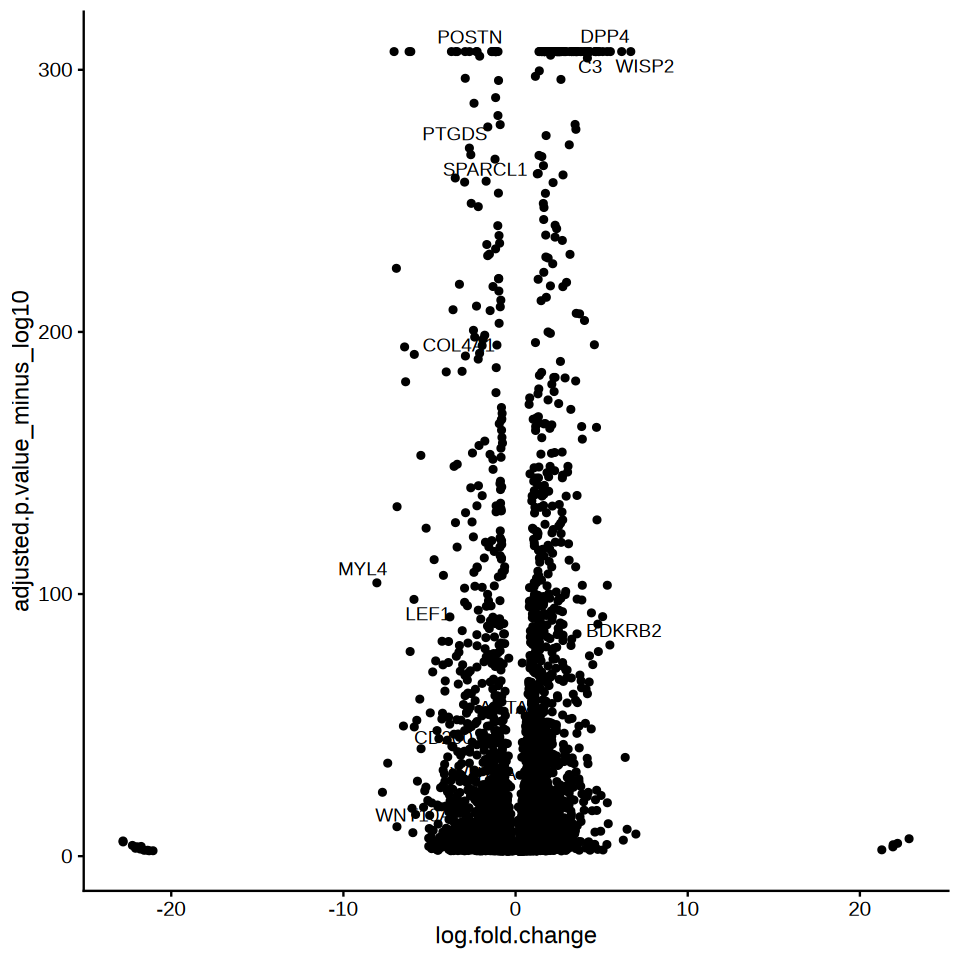

In [11]:
options(repr.plot.height = 8, repr.plot.width = 8)

p <- ggplot(data = df, aes(x = log.fold.change, y = adjusted.p.value_minus_log10)) +
    geom_text_repel(data = df_text, aes(x = log.fold.change, y = adjusted.p.value_minus_log10, label = gene)) +
    # scale_y_continuous(limits = c(20, 350)) +
    geom_point() +
    theme_cowplot()

print(p)

In [12]:
# select DE genes
df <- subset(df, abs(log.fold.change) > 2)
df <- subset(df, adjusted.p.value_minus_log10 > 100)

In [13]:
df_fib1 <- subset(df, log.fold.change > 0)
df_fib2 <- subset(df, log.fold.change < 0)

In [14]:
df_fib2$cluster <- "Fib2"

In [15]:
df <- rbind(df_fib1, df_fib2)

In [16]:
df_go <- lapply(unique(df$cluster), function(x){
    df_sub <- subset(df, cluster == x)
    
    gostres <- gost(query = df_sub$gene,
                organism = "hsapiens",
               correction_method = "fdr",
               ordered_query = FALSE,
               significant = FALSE,
               measure_underrepresentation = FALSE)
    
    df_res <- gostres$result
    df_res$cluster <- x
    return(df_res)

}) %>% Reduce(rbind, .) %>%
    subset(., select = c("p_value", "source", "term_name", "cluster"))

In [17]:
head(df_go)

,p_value,source,term_name,cluster
,<dbl>,<chr>,<chr>,<chr>
1,0.01619055,CORUM,PDGFB-PDGFRB complex,Fib1
2,0.01619055,CORUM,proMBP-angiotensinogen-c3dg complex,Fib1
3,0.01619055,CORUM,CADM1-4.1B-MPP3 complex,Fib1
4,0.01619055,CORUM,ITGAV-ITGB3-NOV complex,Fib1
5,0.01619055,CORUM,KCNJ11-ABCC9 complex,Fib1
6,0.01619055,CORUM,ADA-DPP4 complex,Fib1


In [18]:
write.csv(df_go, glue::glue("{out_dir}/GO_analysis.csv"))

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'CP–LF–MPO complex' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'CP–LF–MPO complex' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'CP–LF–MPO complex' in 'mbcsToSbcs': dot substituted for <93>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'CP–LF–MPO complex' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'CP–LF–MPO complex' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'CP–LF–MPO complex' in 'mbcsToSbcs': dot substituted fo

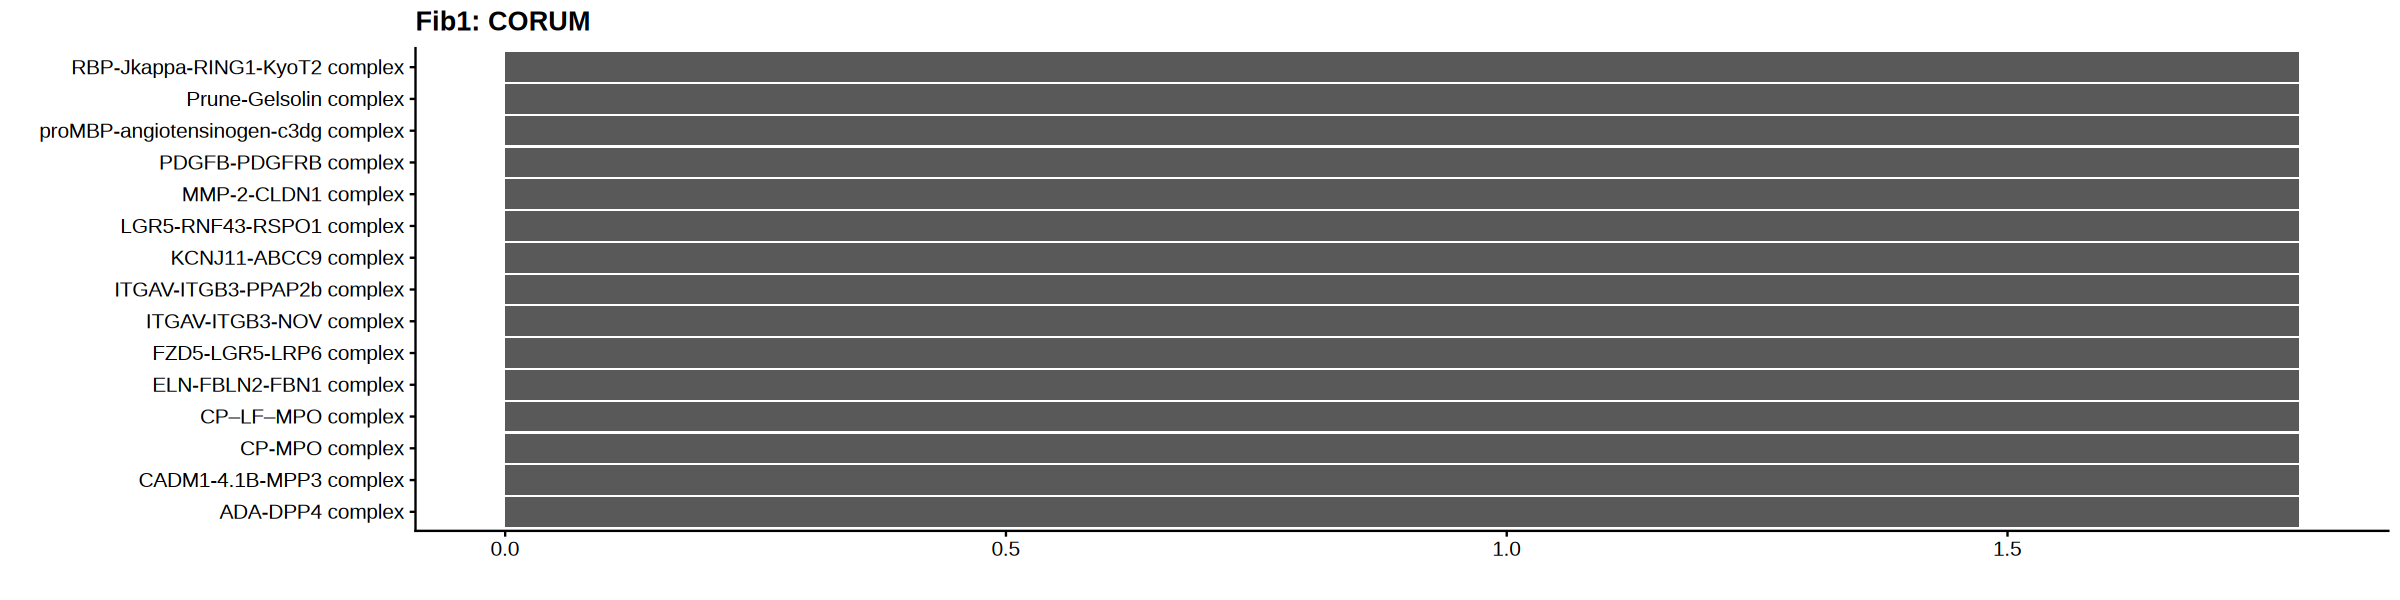

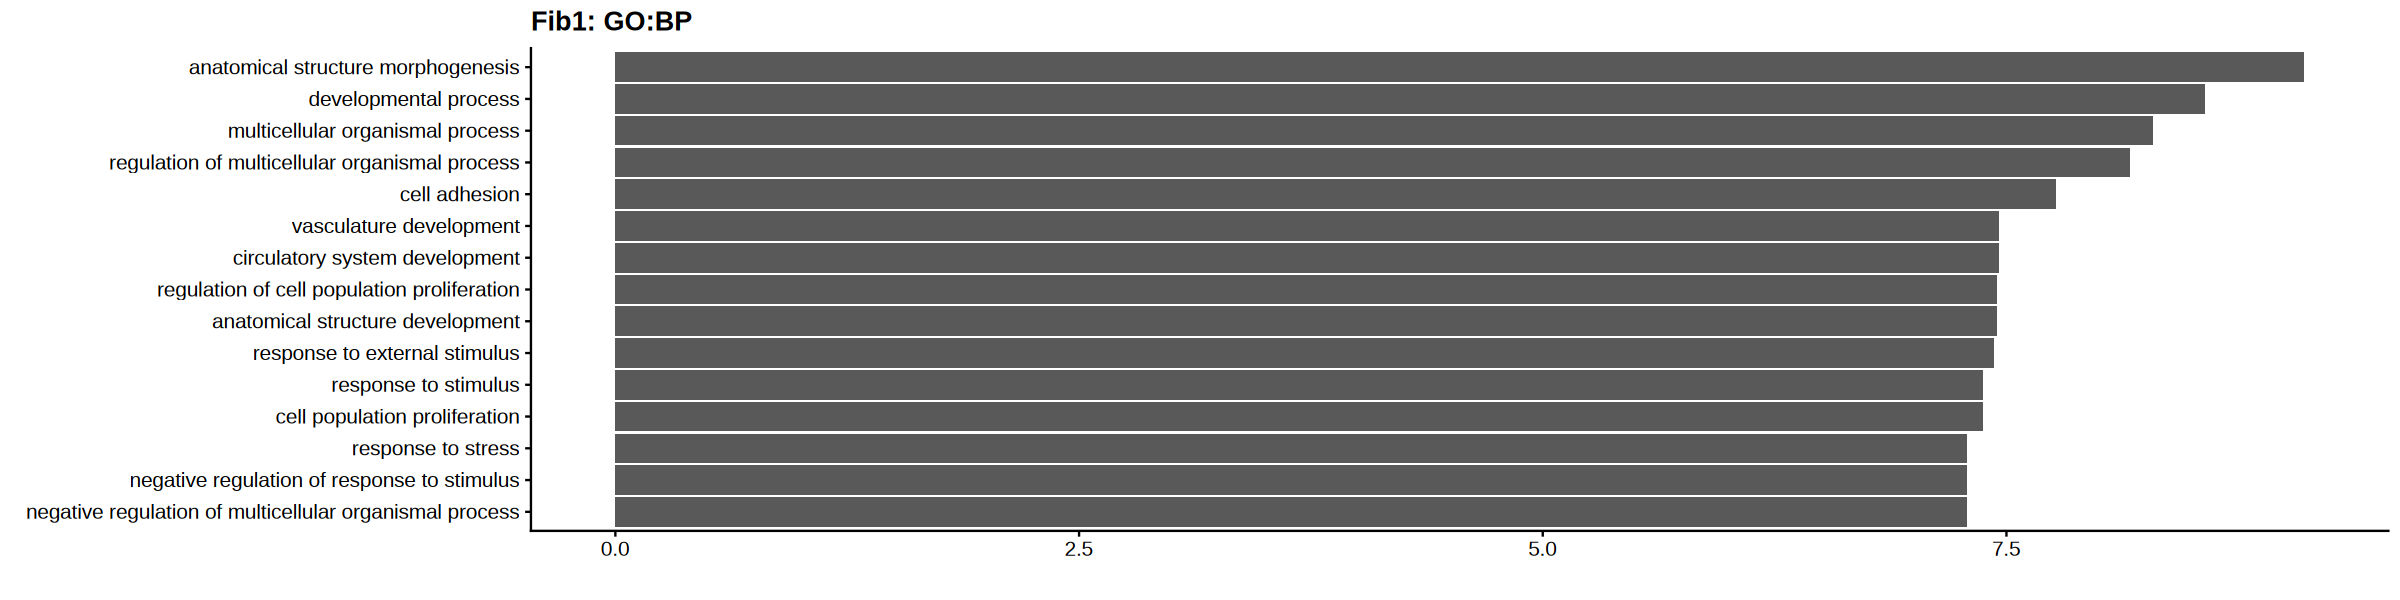

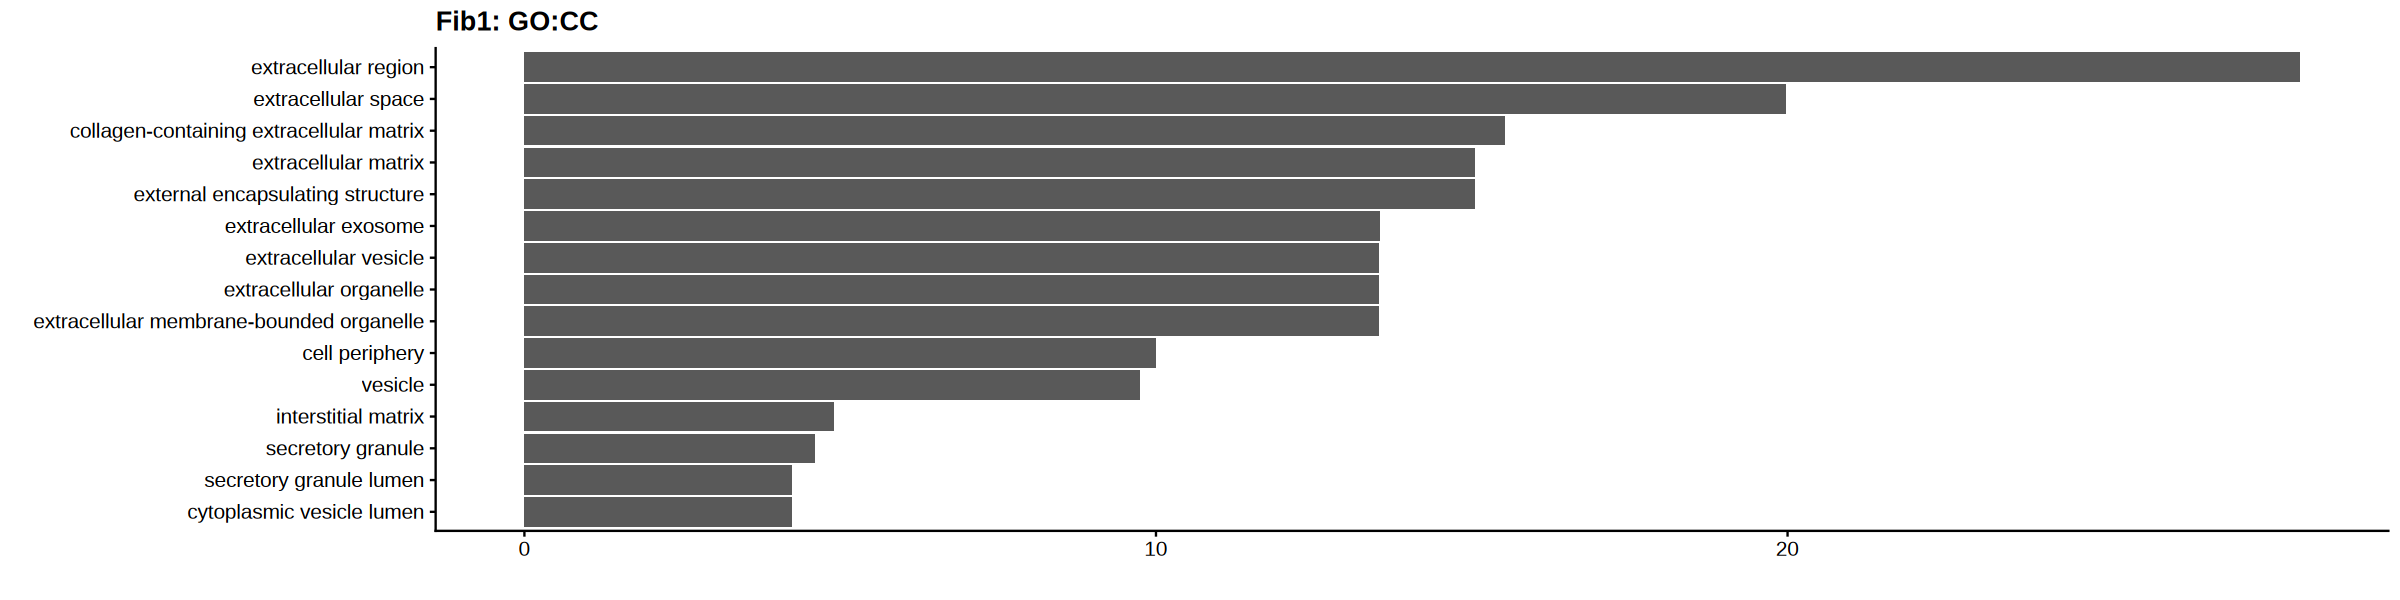

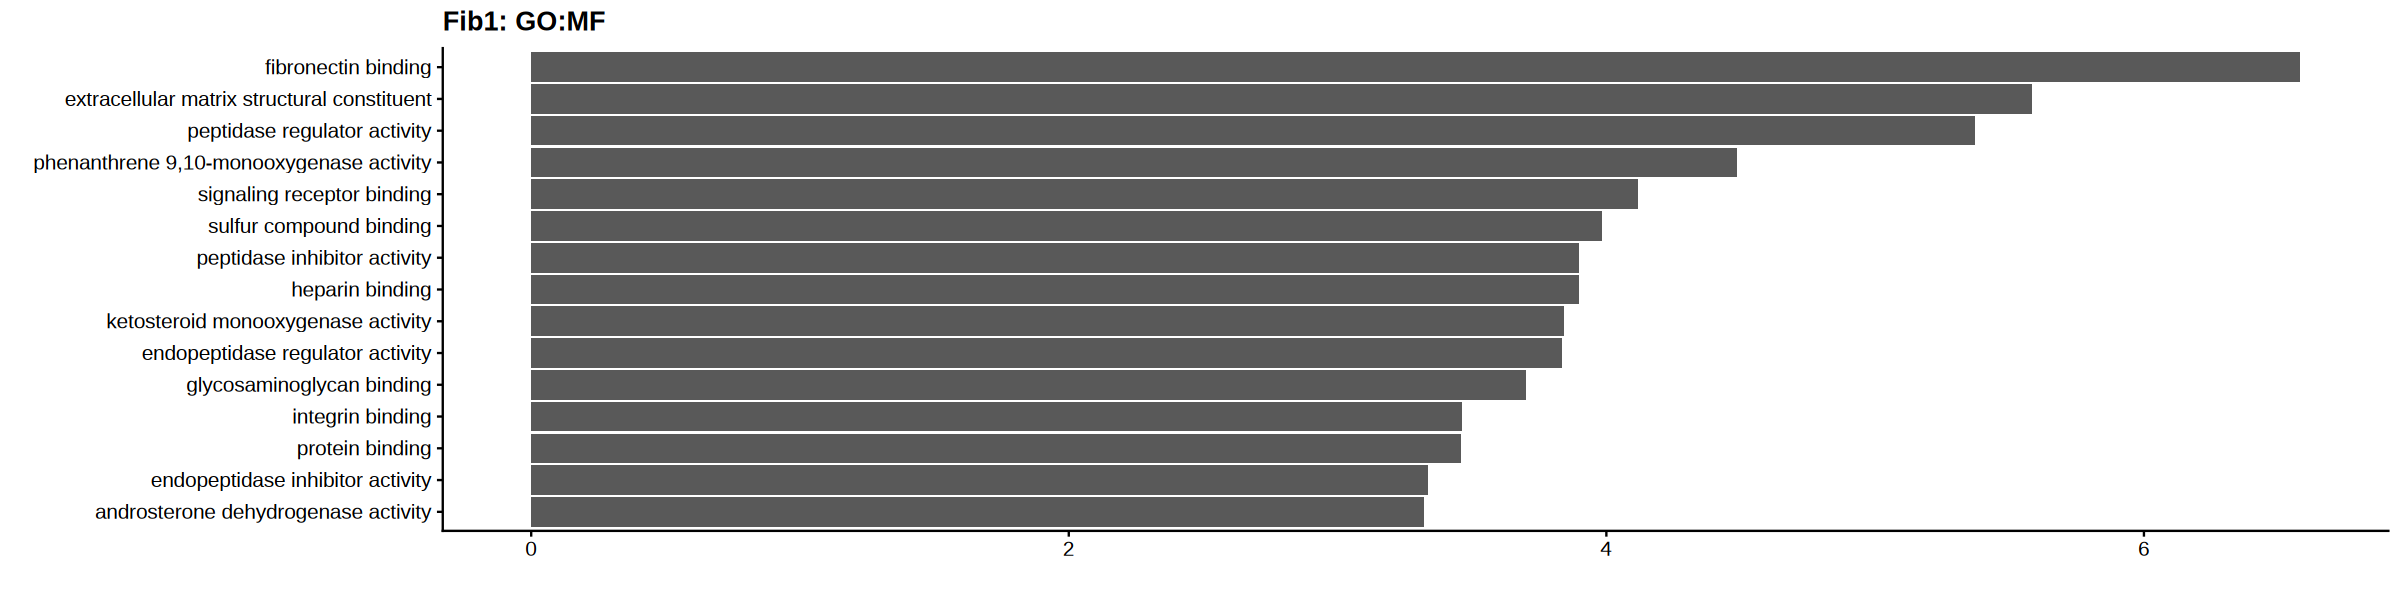

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'endometrium; smooth muscle cells[≥Low]' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'endometrium; smooth muscle cells[≥Low]' in 'mbcsToSbcs': dot substituted for <89>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'endometrium; smooth muscle cells[≥Low]' in 'mbcsToSbcs': dot substituted for <a5>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'rectum; fibroblasts[≥Low]' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'rectum; fibroblasts[≥Low]' in 'mbcsToSbcs': dot substituted for <89>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :

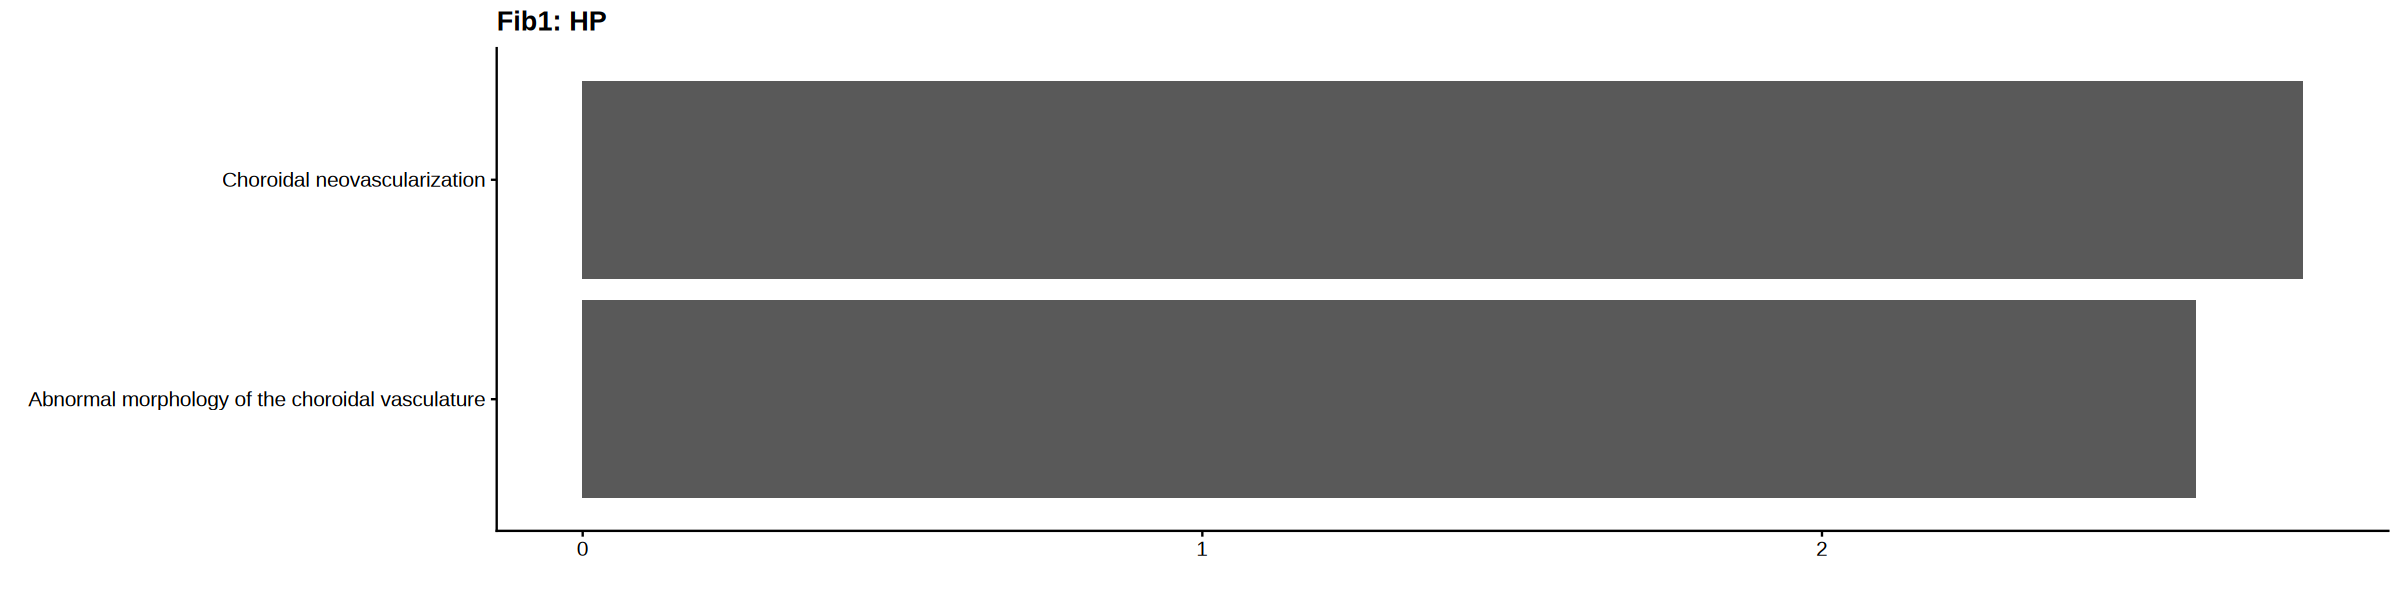

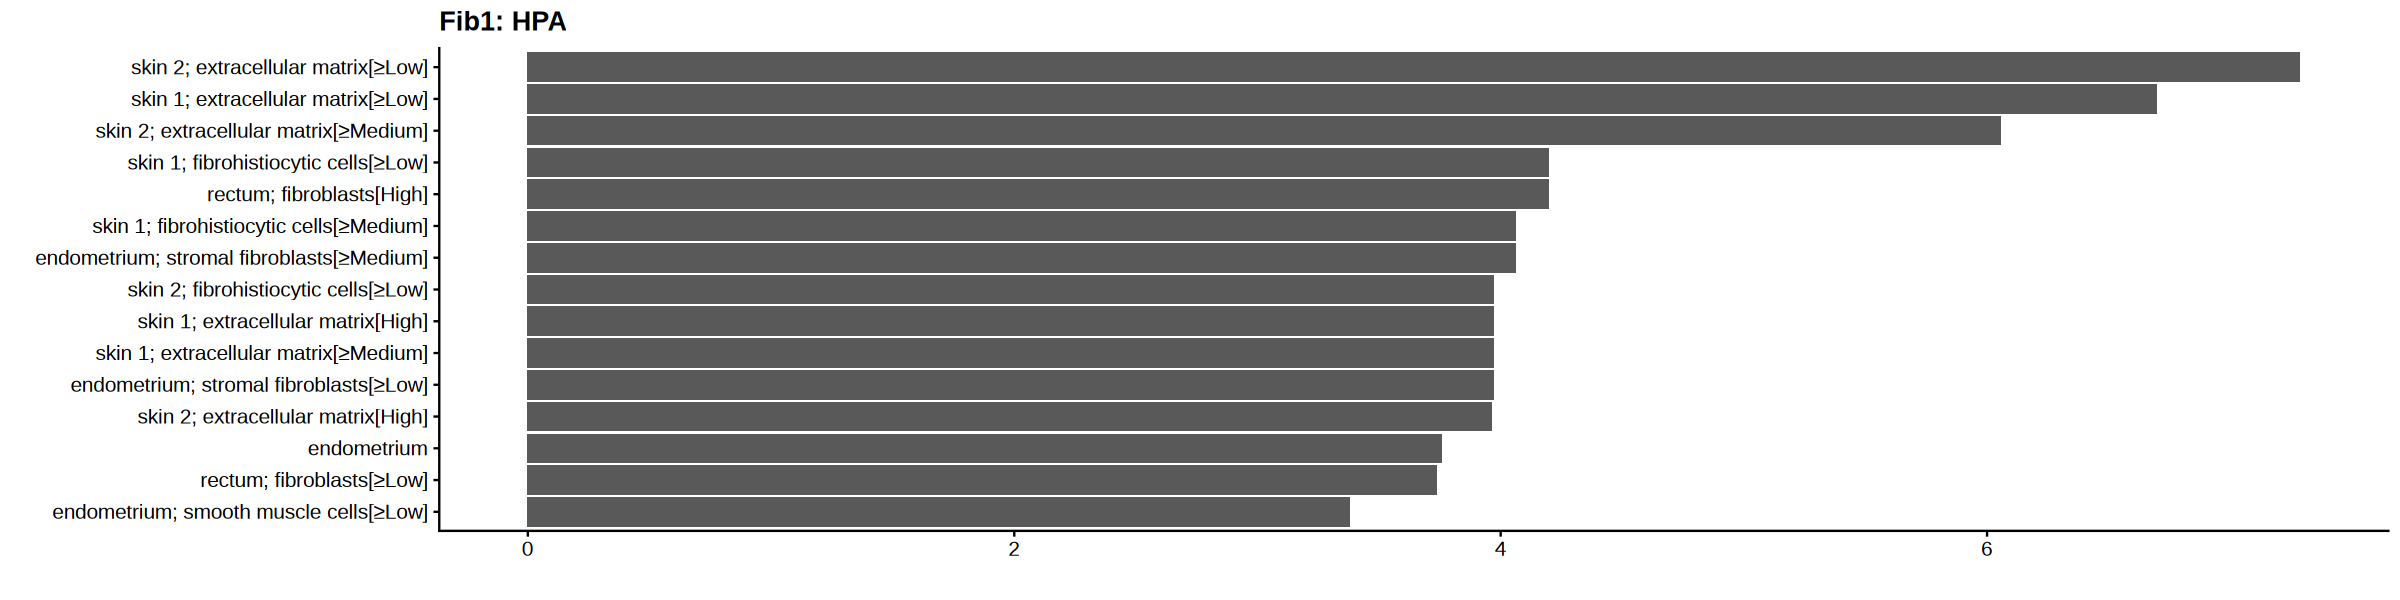

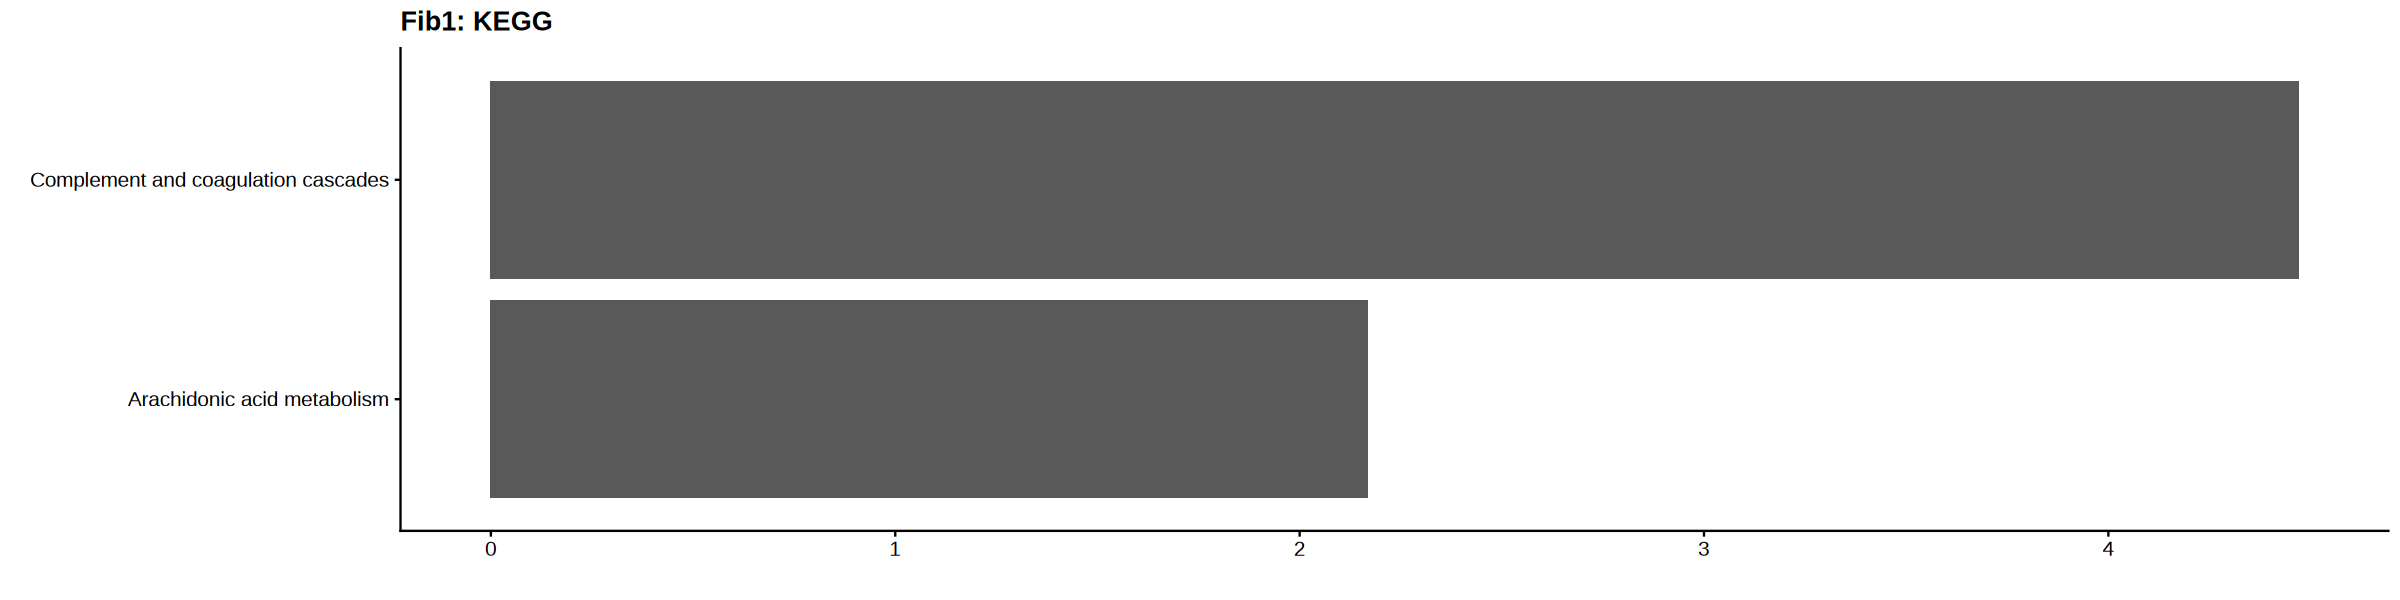

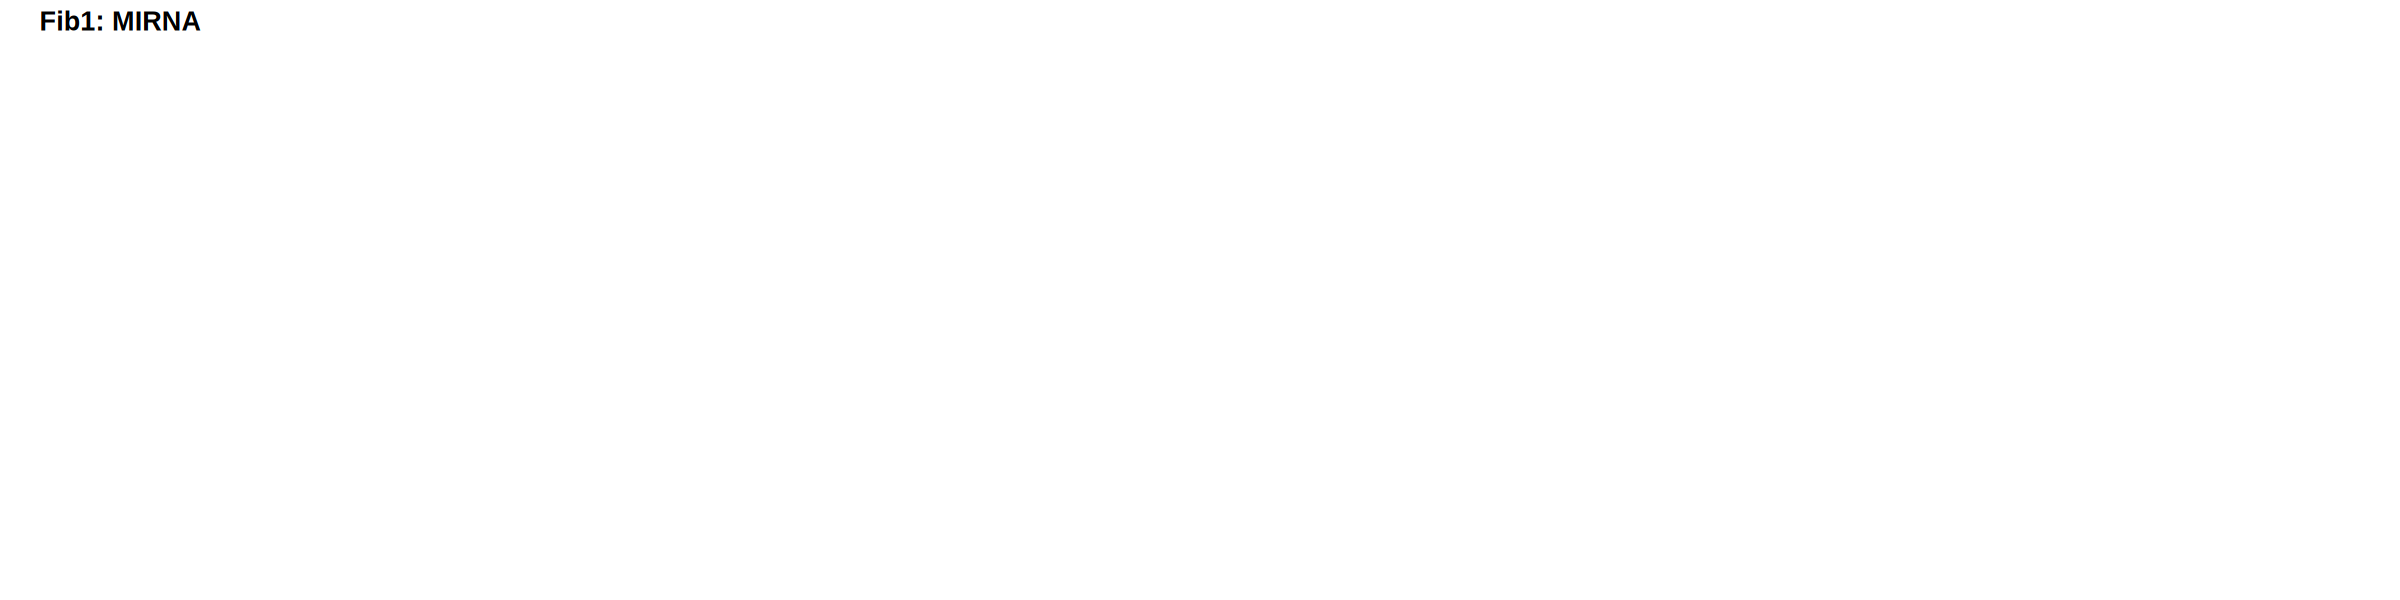

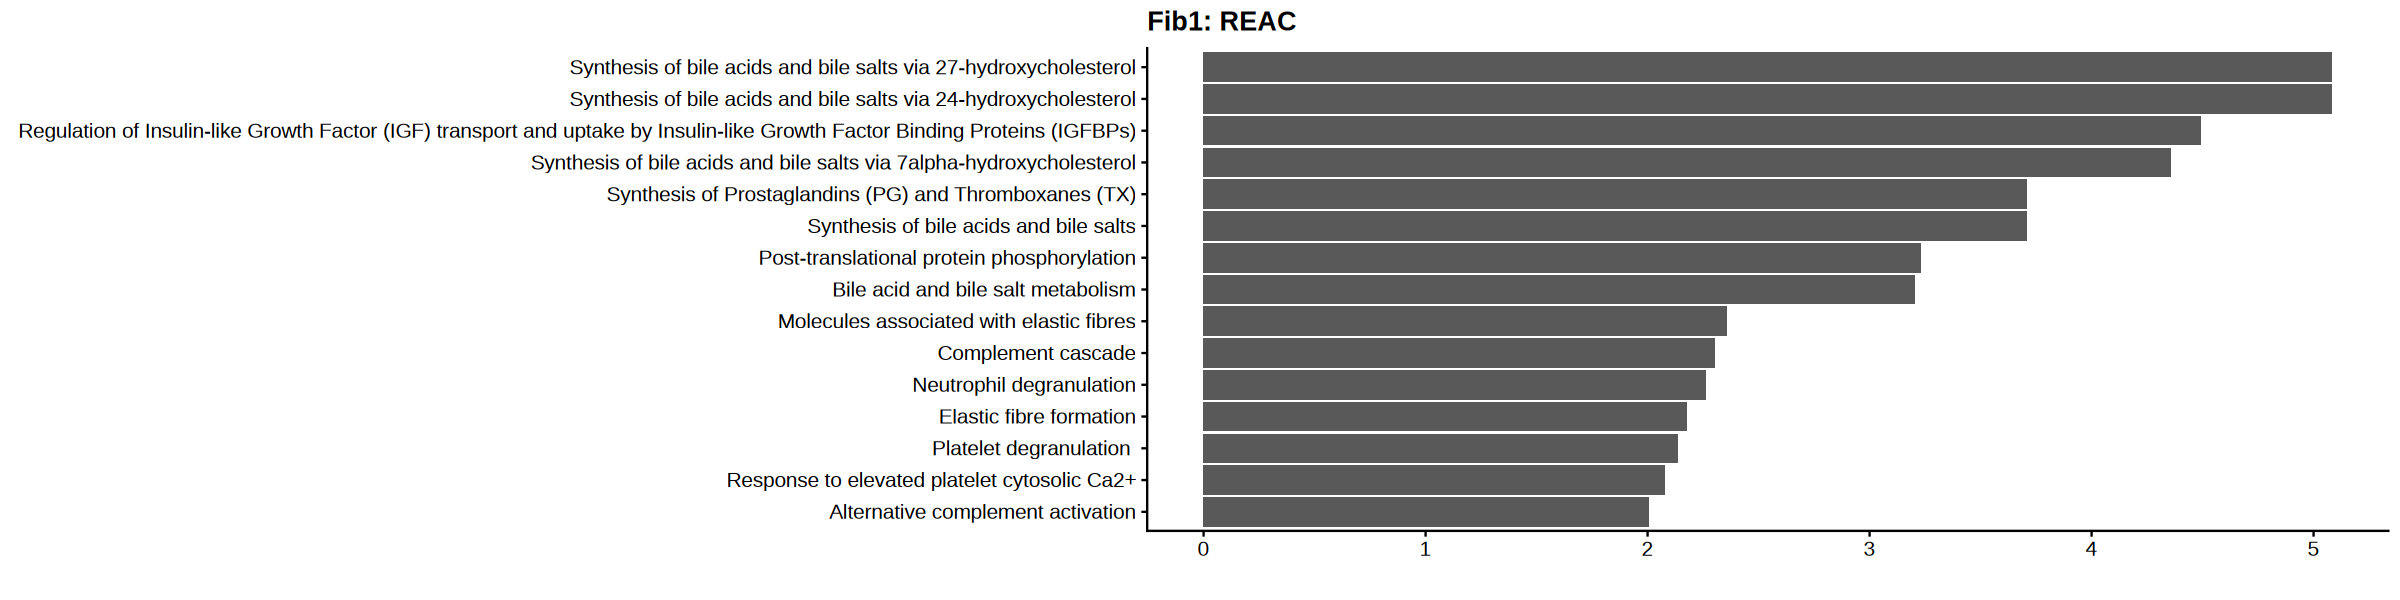

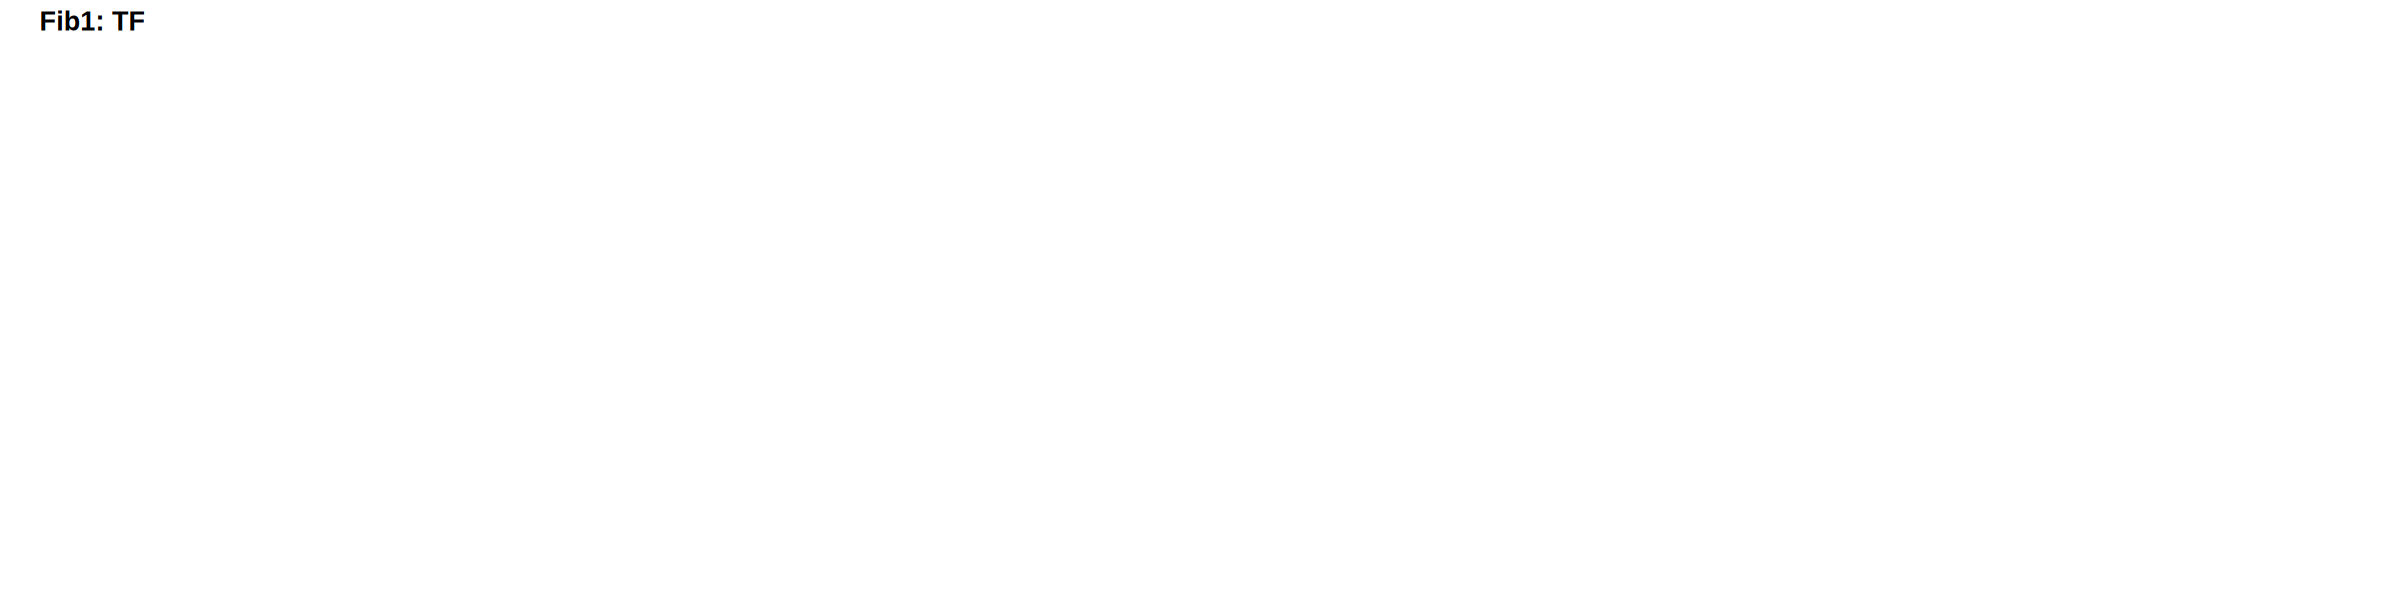

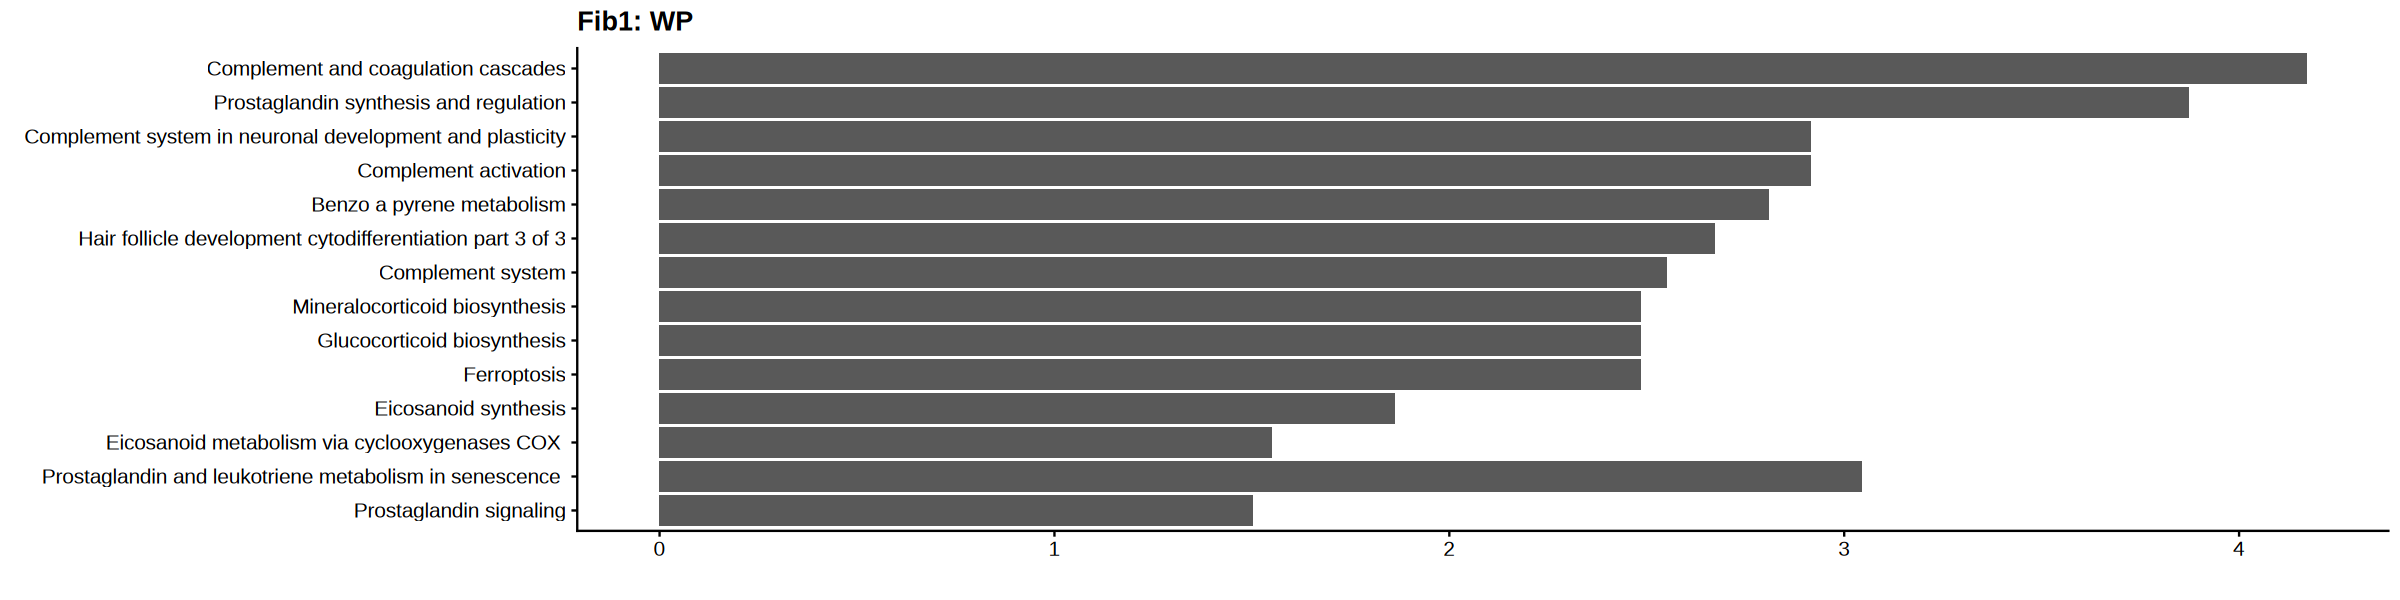

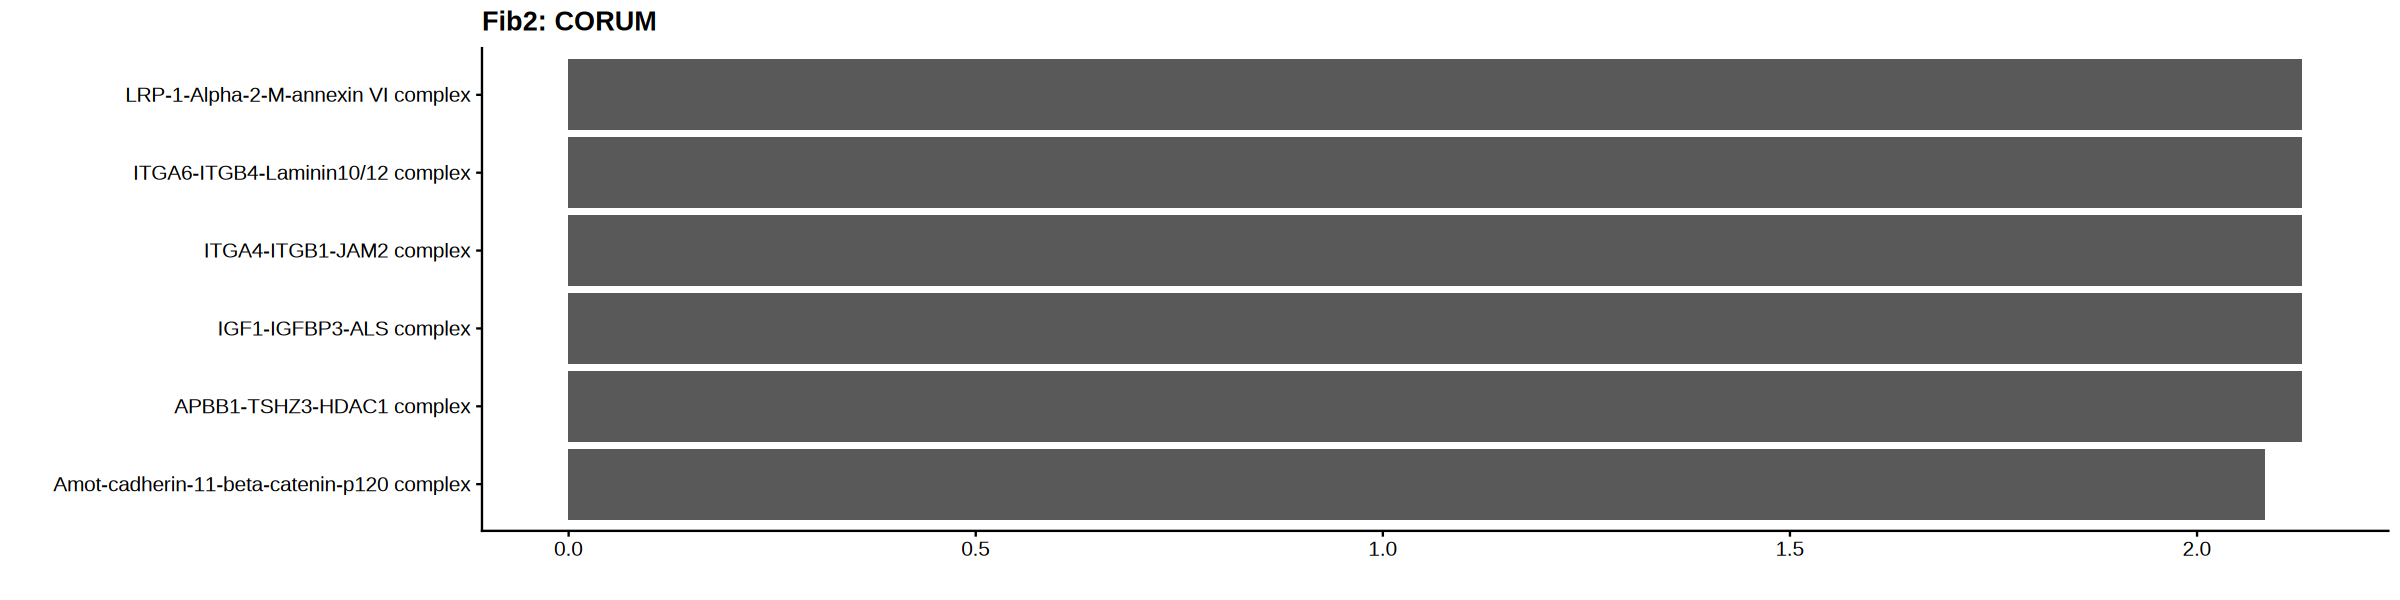

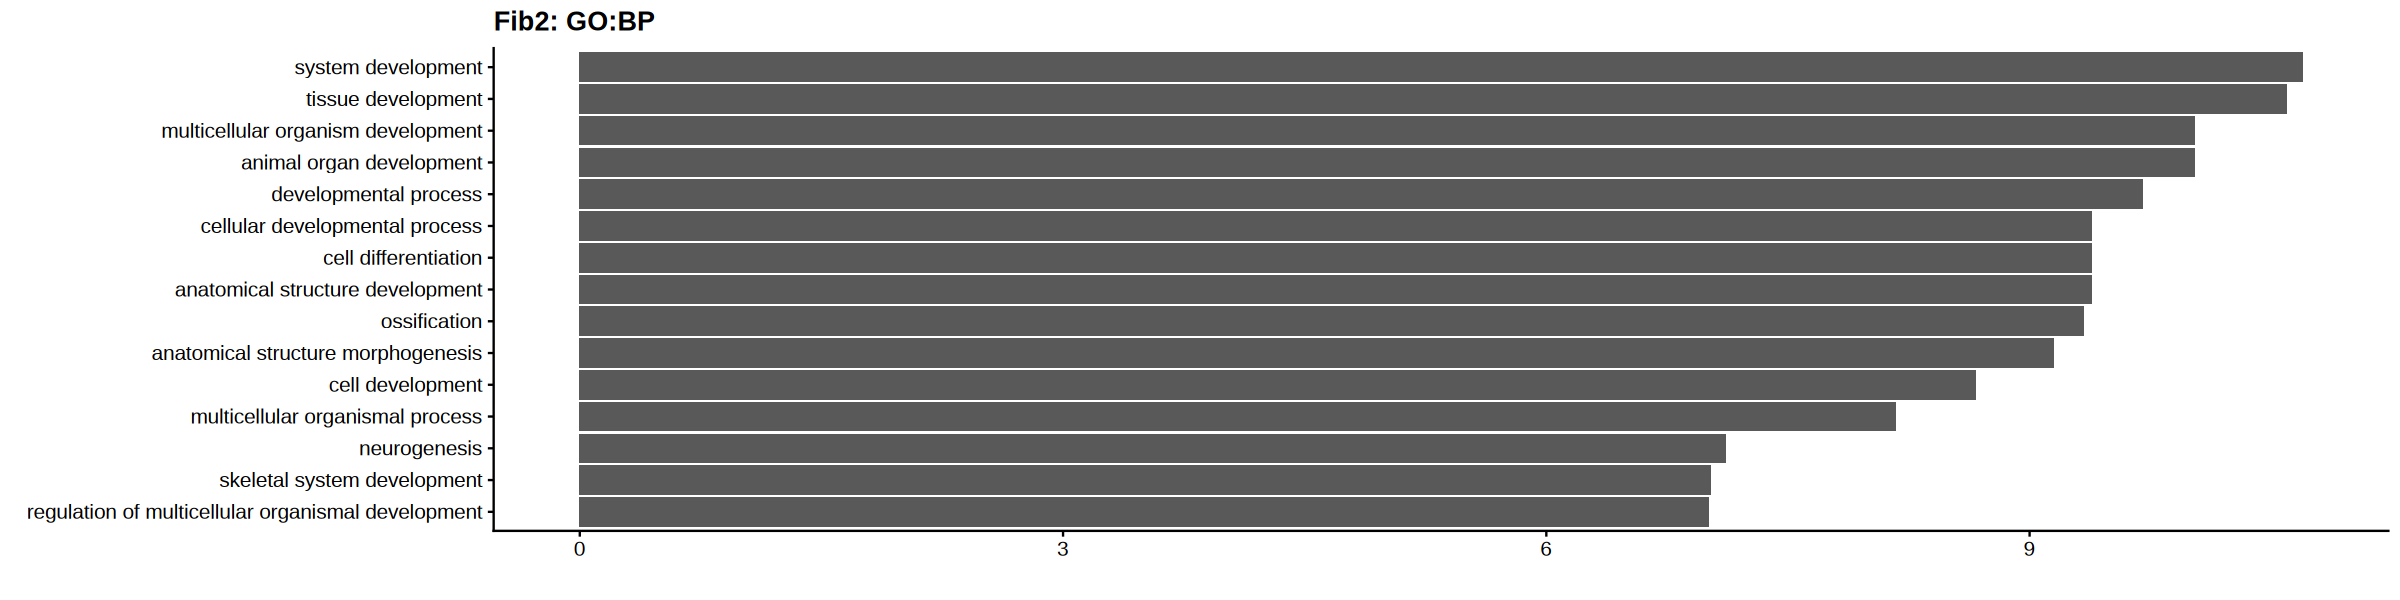

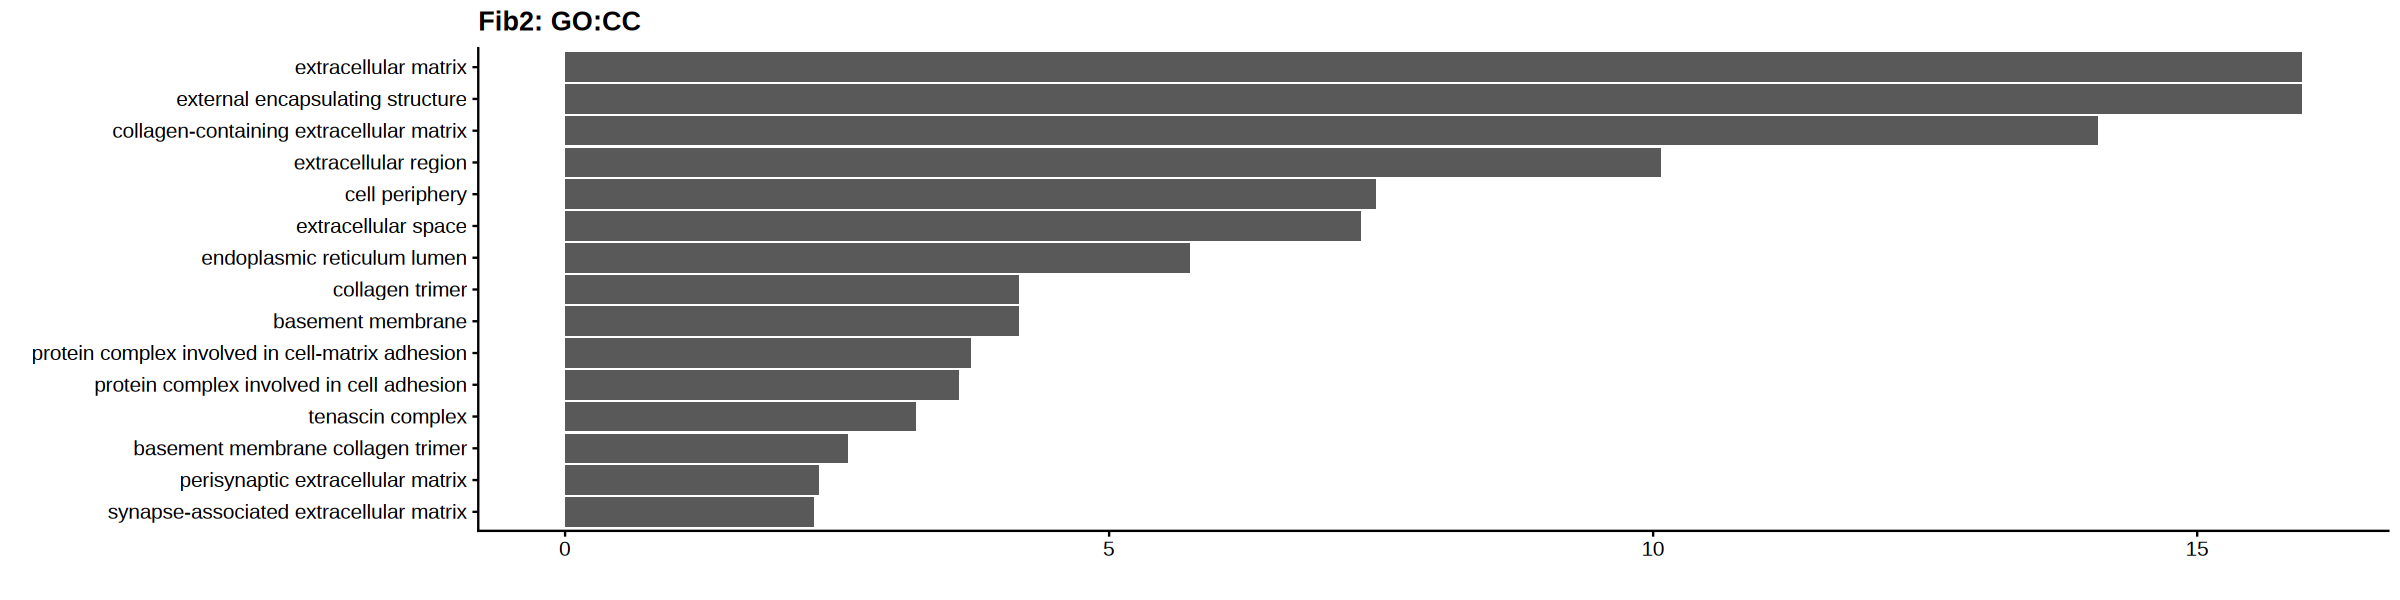

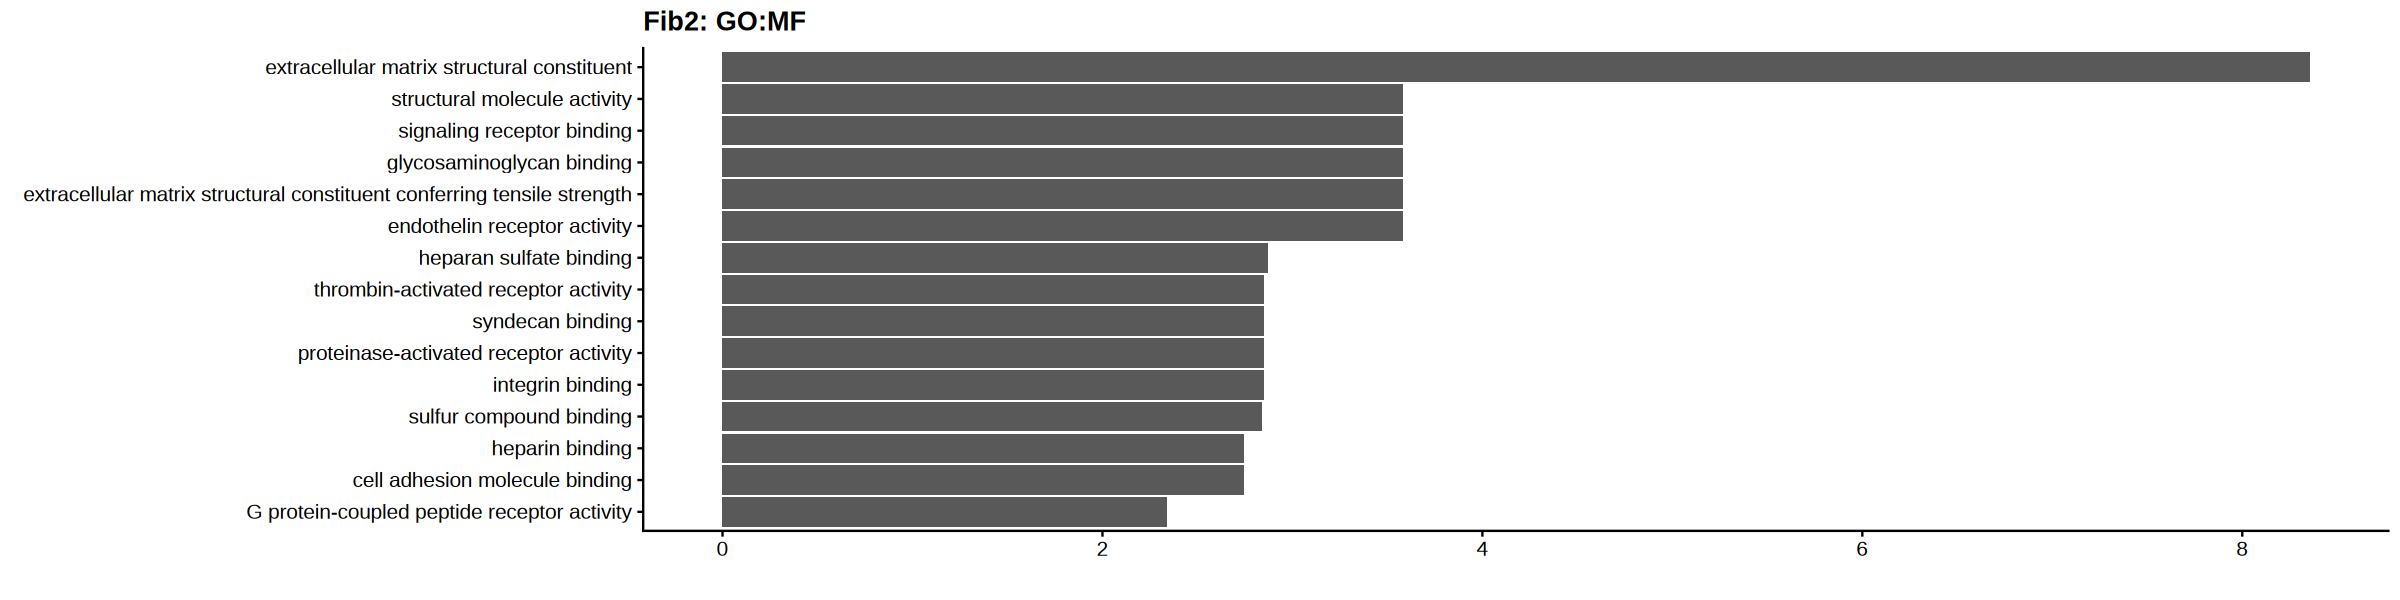

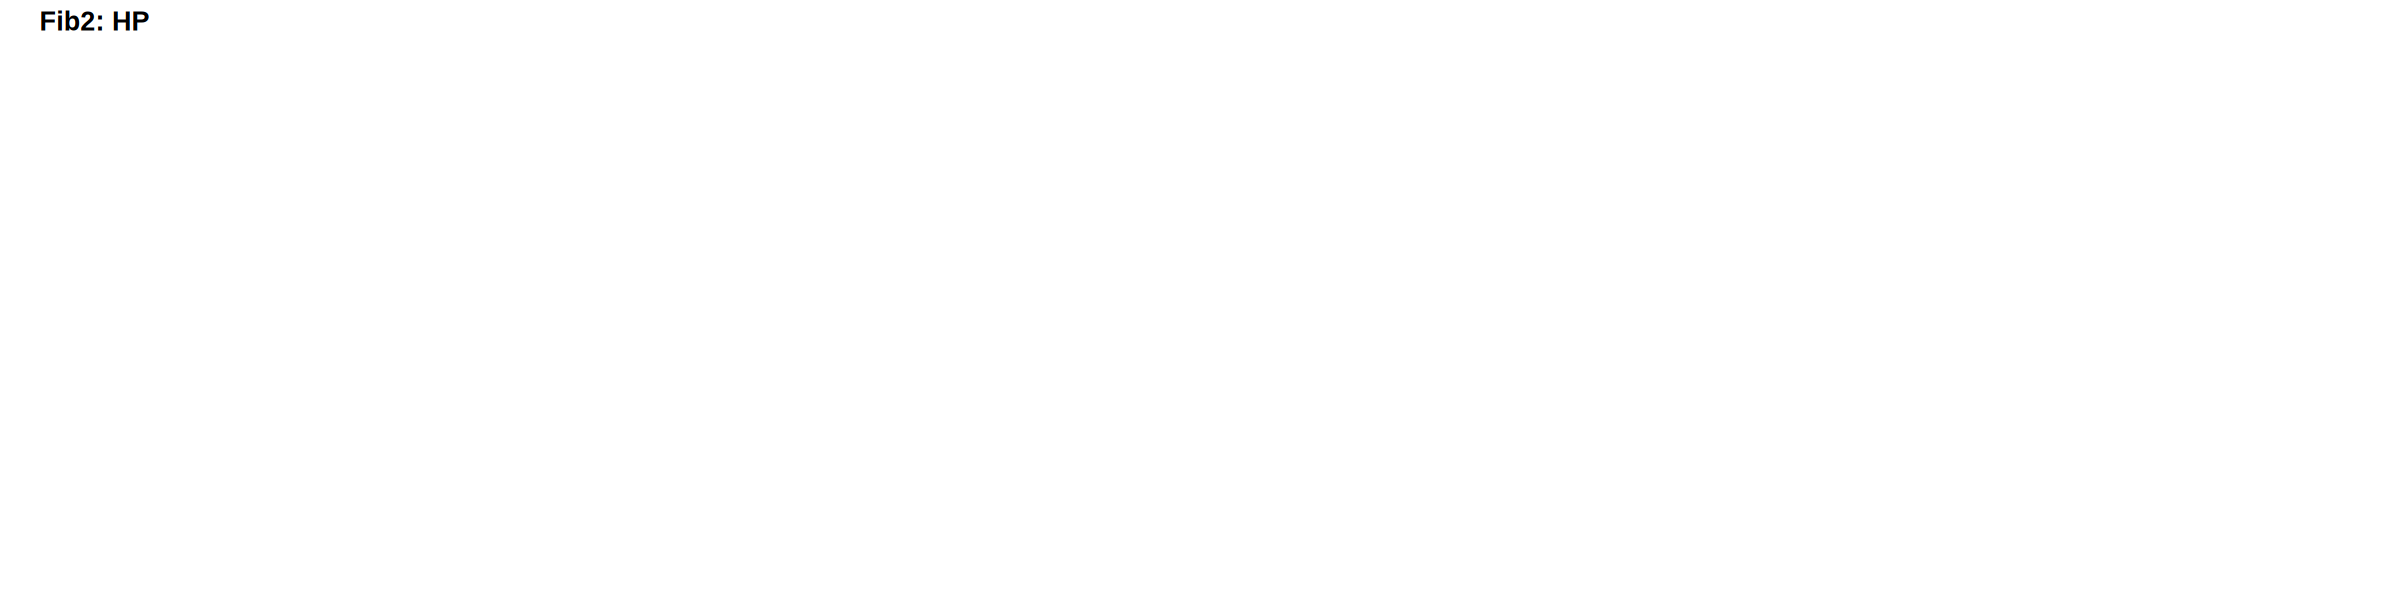

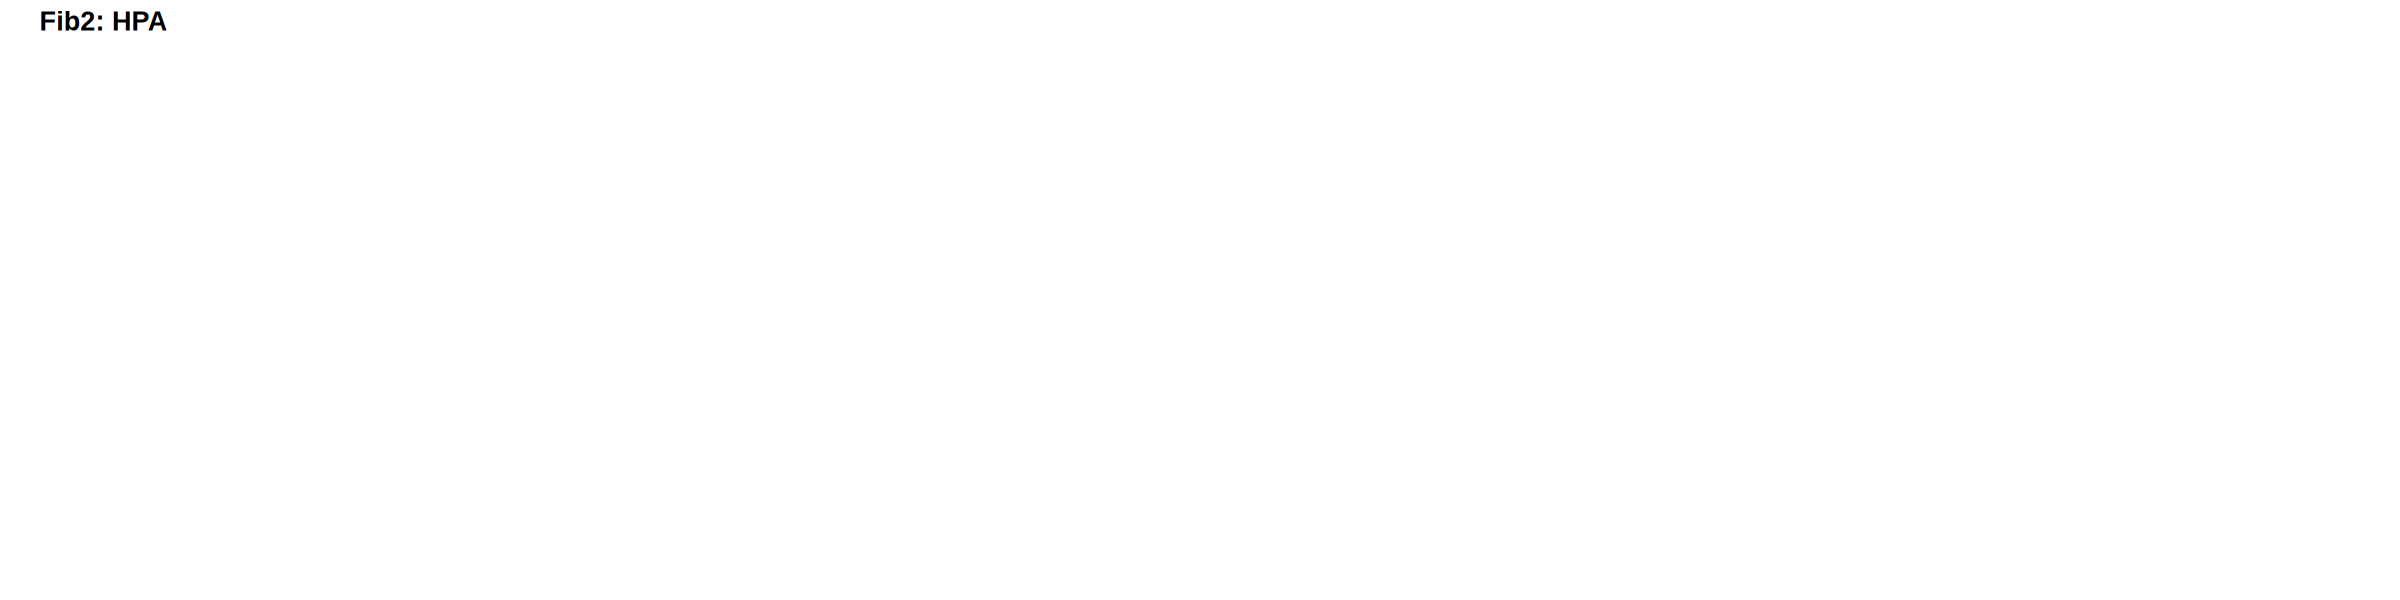

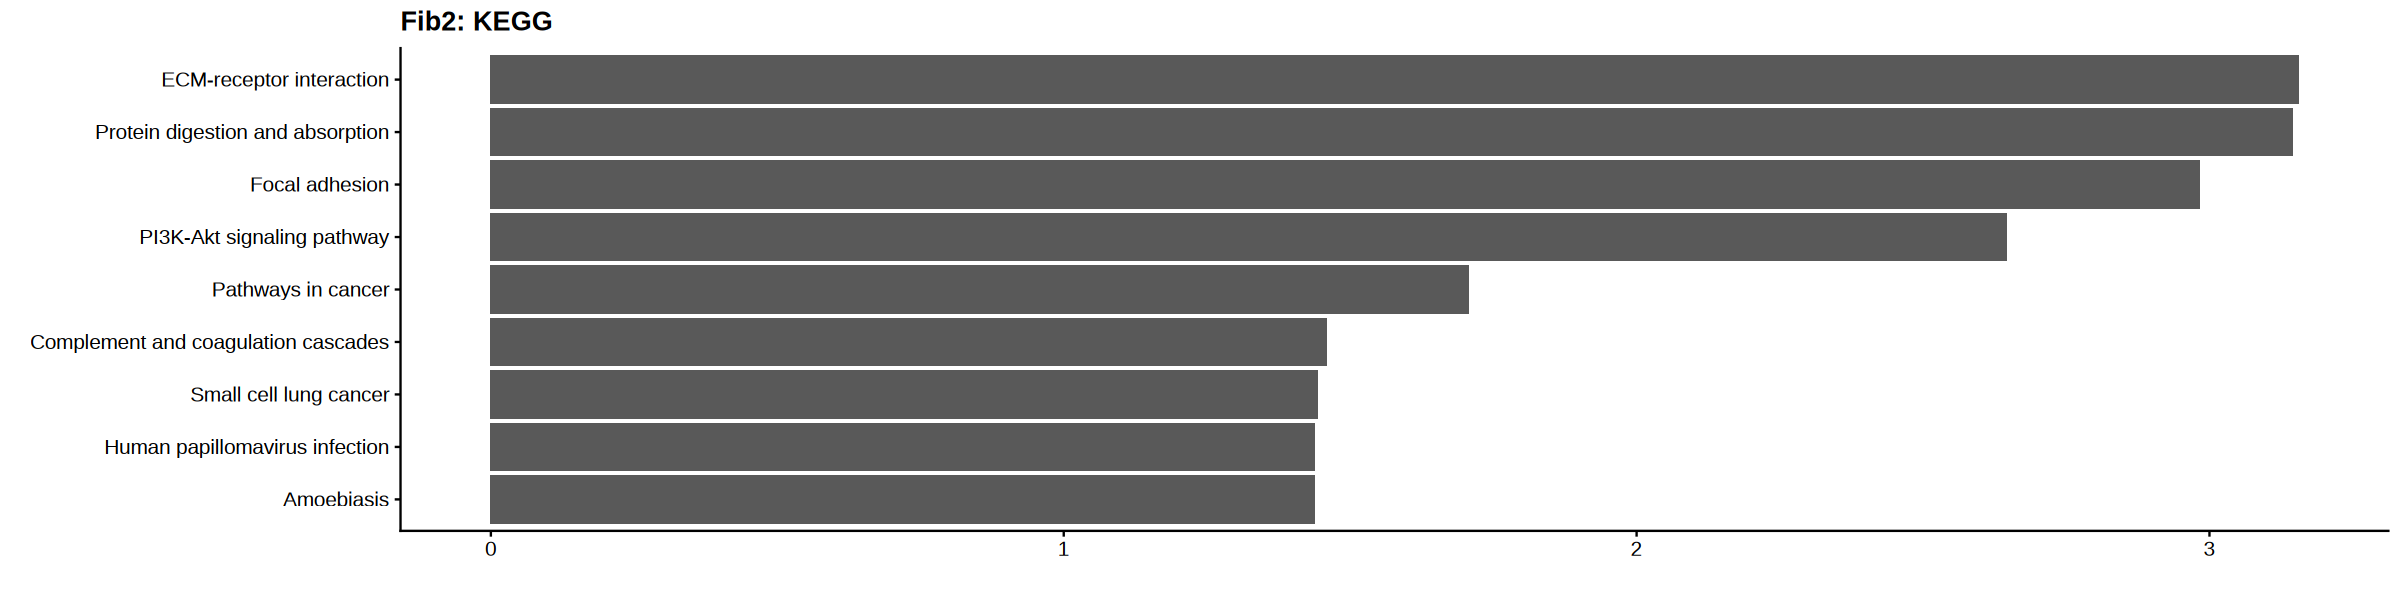

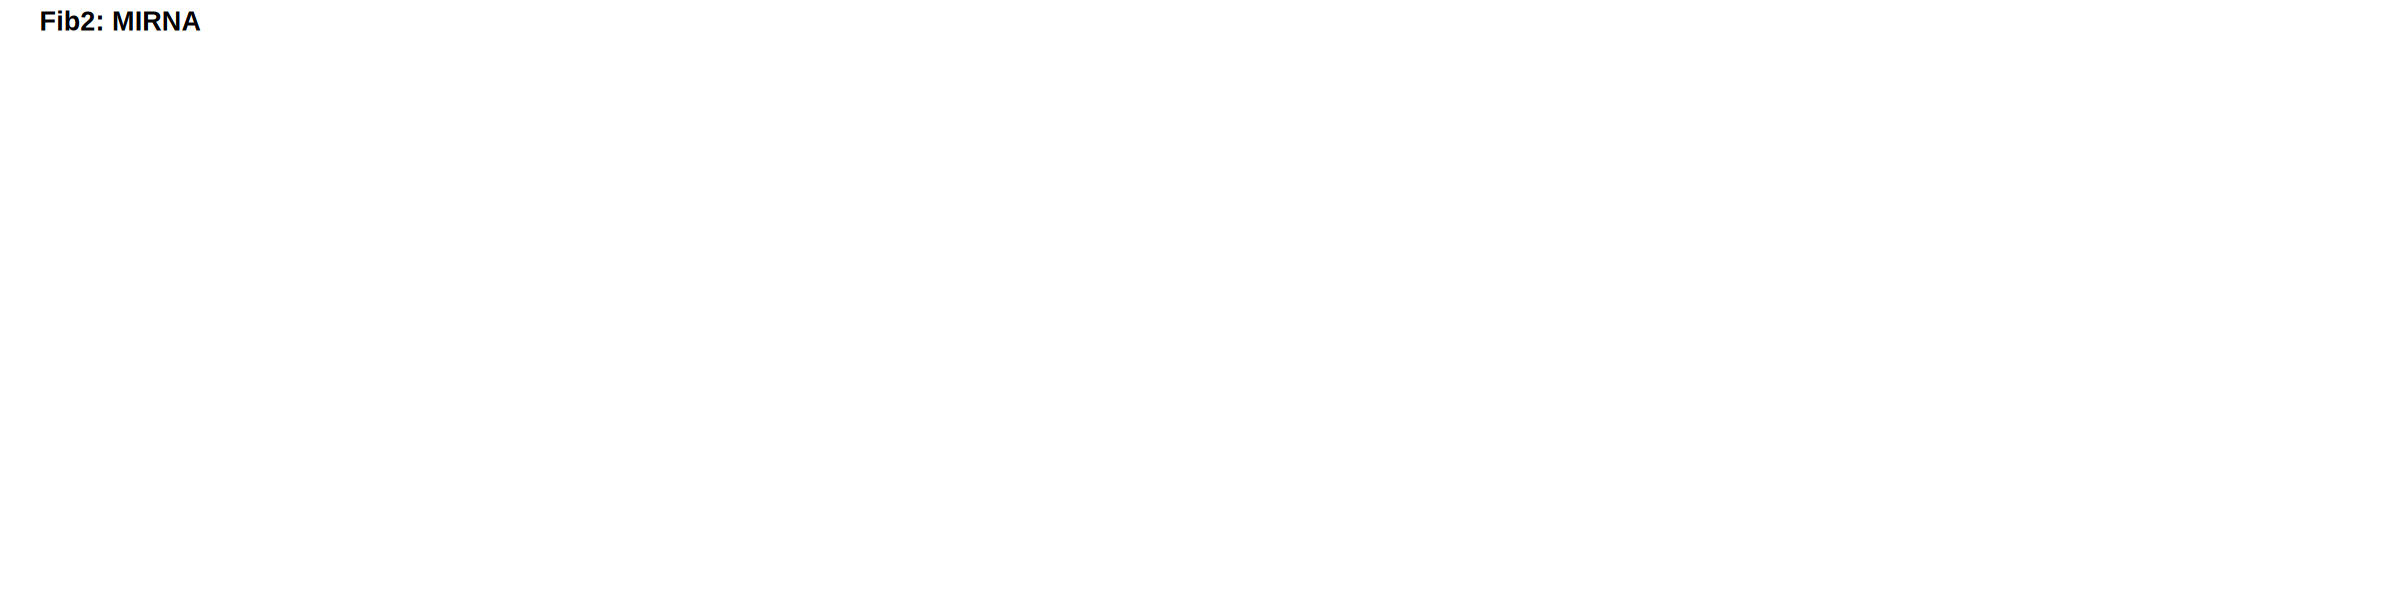

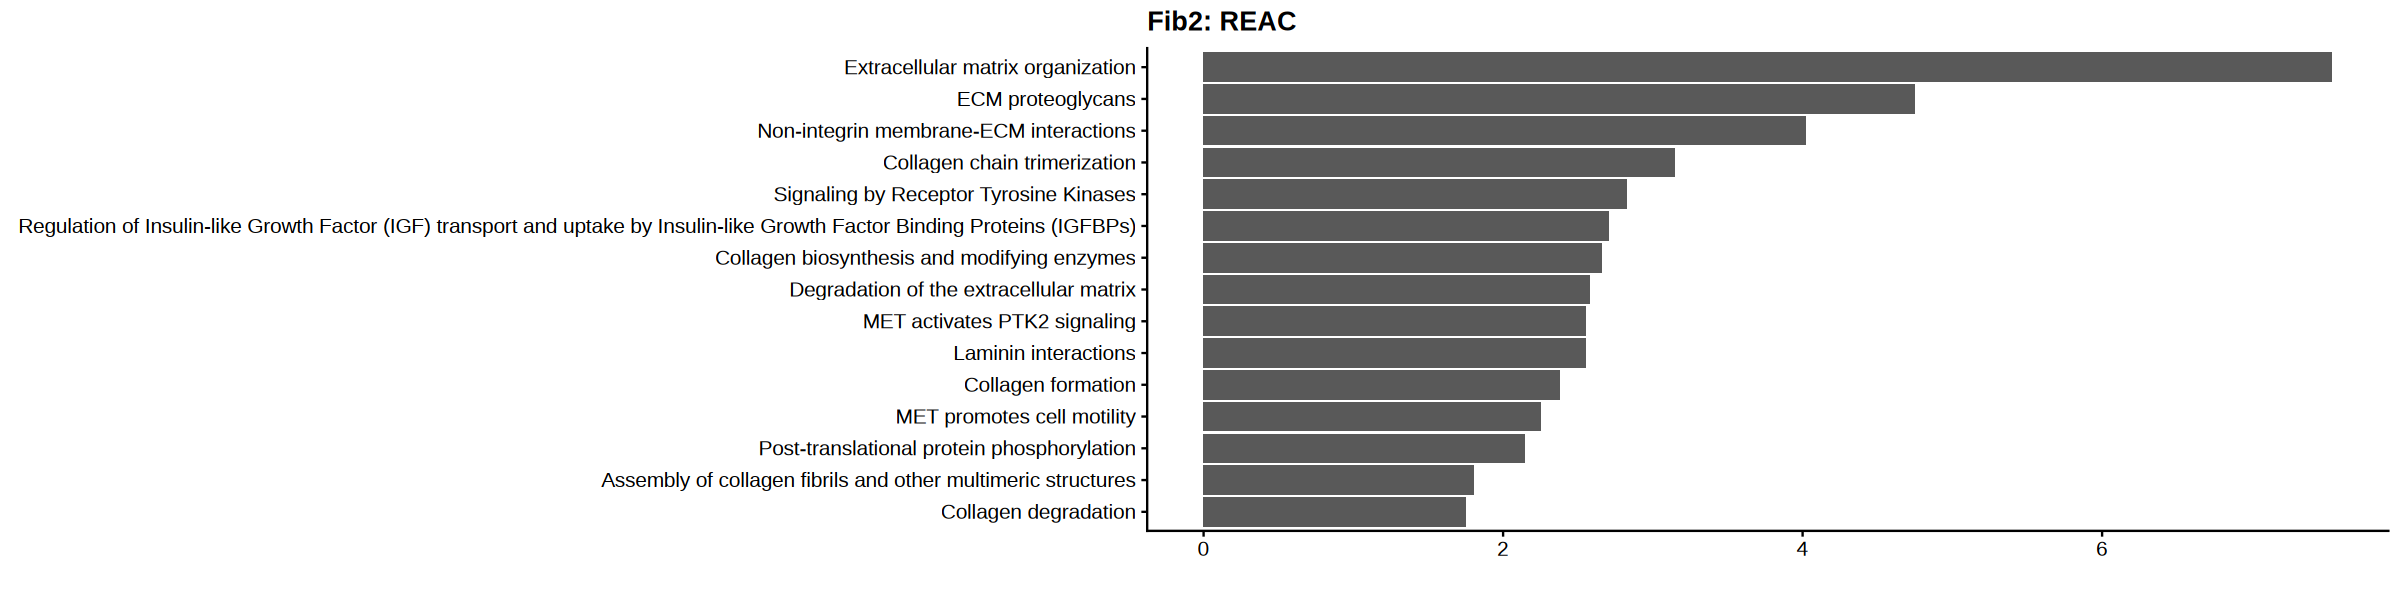

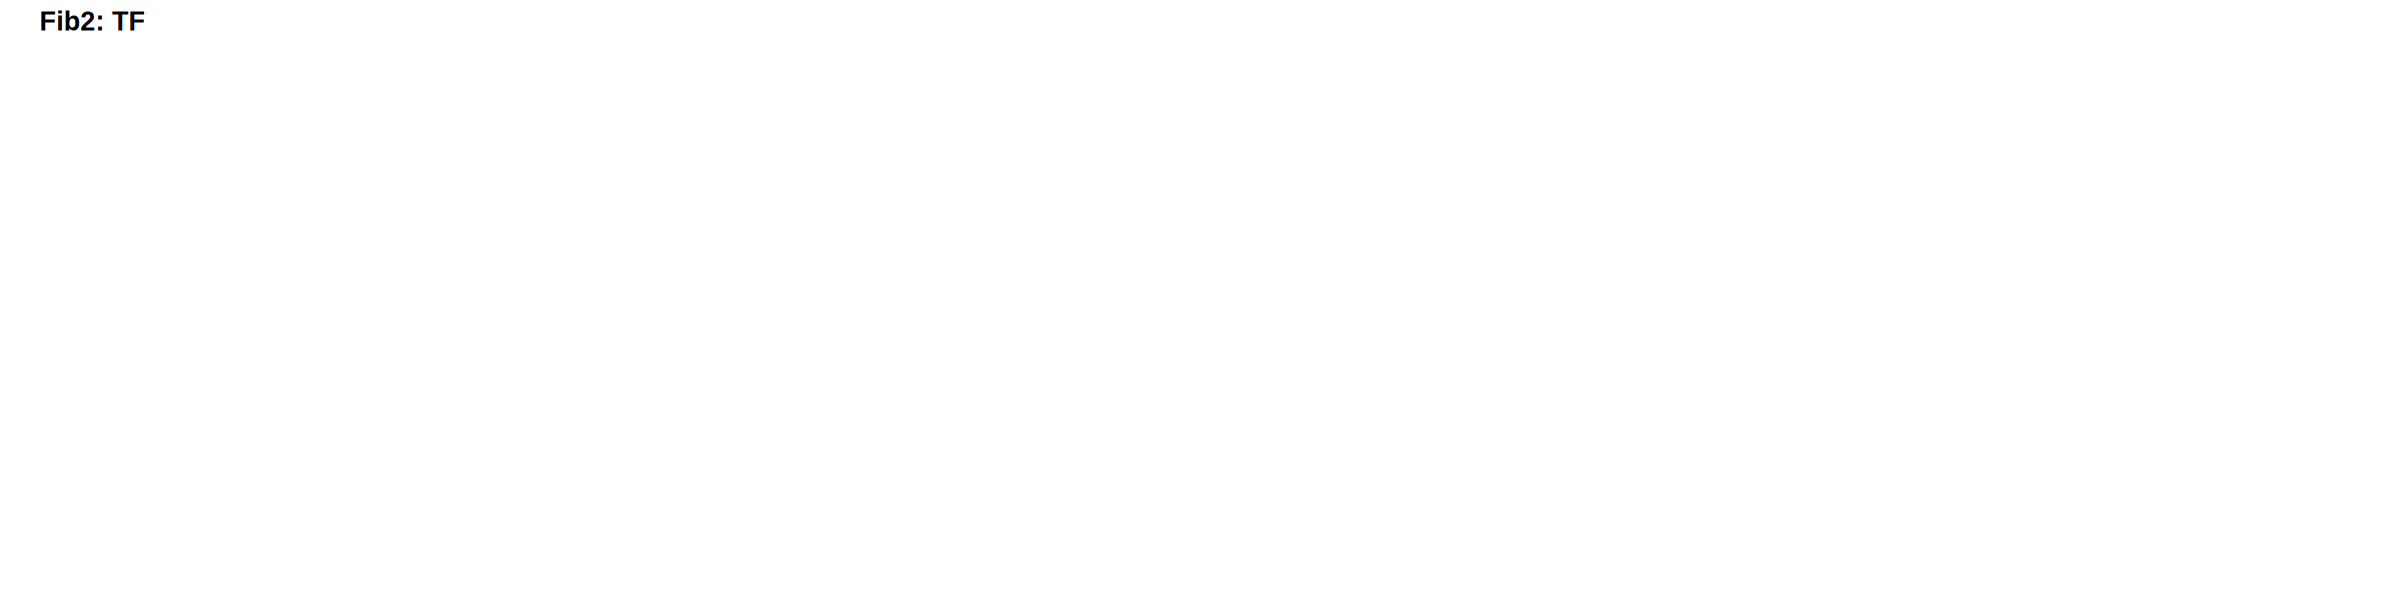

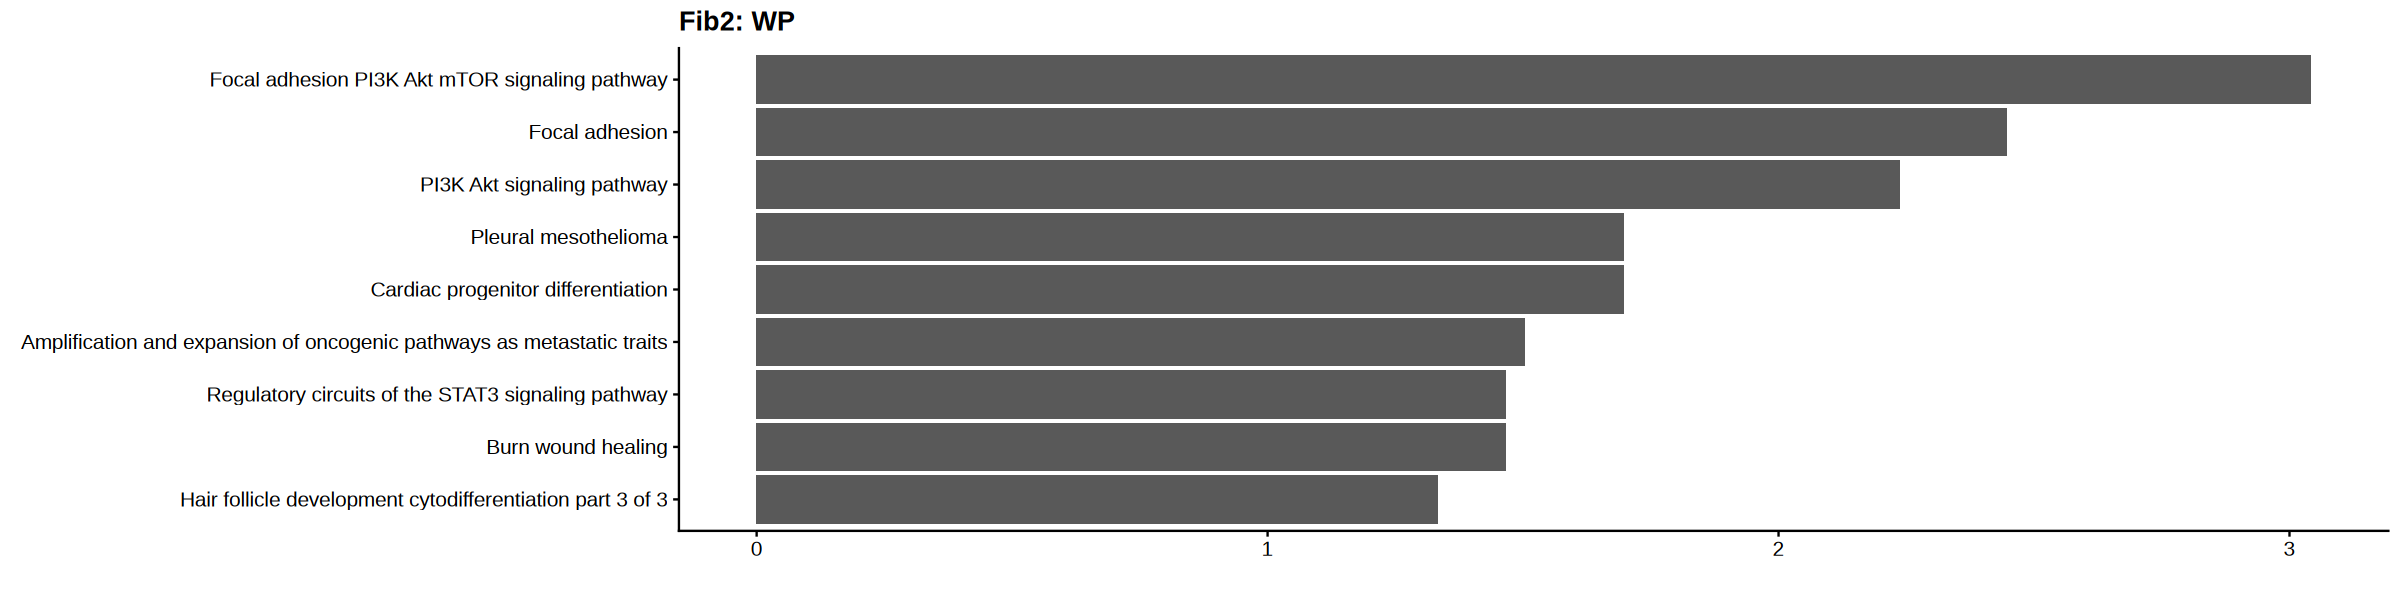

In [20]:
# plot top15 terms based on p-values
options(repr.plot.height = 5, repr.plot.width = 20)

for(c in unique(df_go$cluster)){
    for(s in unique(df_go$source)){
        
        df_go_sub <- df_go %>%
            subset(cluster == c & source == s & p_value < 0.05) %>%
            mutate(p_value = -log10(p_value)) %>%
            slice_max(n = 15, order_by = p_value, with_ties = FALSE)
        
        p <- ggplot(data=df_go_sub, aes(x = reorder(term_name, p_value), y = p_value)) +
                geom_bar(stat = "identity") +
                coord_flip() +
                xlab("") + ylab("") +
                theme_cowplot() +
                ggtitle(glue::glue("{c}: {s}"))
    
        print(p)
    
    }
}